In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_air_quality_data.csv to cleaned_air_quality_data.csv


In [4]:
data_path = "/content/cleaned_air_quality_data.csv"

In [5]:
data = pd.read_csv(data_path)
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [6]:
#combining the date and the time column
data['Date_Time'] = data['Date']+ ' '+ data['Time']
data.drop(columns=['Date', 'Time'], inplace=True)
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",10/03/2004 18.00.00
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",10/03/2004 19.00.00
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",10/03/2004 20.00.00
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",10/03/2004 21.00.00
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",10/03/2004 22.00.00


In [7]:
#Next, I make the commas to be full stops and
for col in data.columns:
  if col != 'Date_Time':
    data[col] = data[col].astype(str).str.replace(',', '.', regex=False)
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [8]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10/03/2004 18.00.00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10/03/2004 19.00.00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10/03/2004 20.00.00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10/03/2004 21.00.00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10/03/2004 22.00.00


In [9]:
# I fill all the empty values wth their means, I only used the numbers and not the dates so the numbers remain as timestamps.
# an are not changes to integers, that's what include=np.number is for
data.fillna(data.select_dtypes(include=np.number).mean(), inplace=True)

In [10]:
# now I set the time and date index
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format="%d/%m/%Y %H.%M.%S", errors='coerce')
data.dropna(subset=['Date_Time'], inplace=True)
data.set_index('Date_Time', inplace=True)
data.sort_index(inplace=True)

#define the threshold of danger

In [11]:
# I define 'Danger' as the top 5% of CO(GT) readings.
co_95th_percentile = data['CO(GT)'].quantile(0.95)
# print(f"Critical CO(GT) Threshold: {co_95th_percentile:.3f}") # 4.700data['CO(GT)'].quantile(0.95)

In [12]:
data['CO_Exceed'] = (data['CO(GT)'] >= co_95th_percentile).astype(int)

In [13]:
# SHIFT the target backward by 24 hours to create the 24-hour look-ahead
# Current row (t) predicts the event at (t+24)
data['TARGET_24H'] = data['CO_Exceed'].shift(-24)
data.dropna(subset=['TARGET_24H'], inplace=True) # Drop last 24 rows where the future is unknown

In [14]:
# --- 3. Create Time Series Clues (Lagged Features 'X') ---
# Create a memory for the model by looking back 1, 6, 12, and 24 hours
cols_to_lag = ['CO(GT)', 'T', 'RH', 'NOx(GT)', 'C6H6(GT)']
lag_periods = [1, 6, 12, 24]

for col in cols_to_lag:
    for lag in lag_periods:
        data[f'{col}_LAG_{lag}H'] = data[col].shift(lag)

In [15]:
data.dropna(inplace=True)

In [16]:
# Save the prepared data for the next step (modeling)
data.to_csv('lagged_air_quality_data.csv')

#Data Modelling

In [17]:
data = pd.read_csv("lagged_air_quality_data.csv", index_col='Date_Time', parse_dates=True)
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,RH_LAG_12H,RH_LAG_24H,NOx(GT)_LAG_1H,NOx(GT)_LAG_6H,NOx(GT)_LAG_12H,NOx(GT)_LAG_24H,C6H6(GT)_LAG_1H,C6H6(GT)_LAG_6H,C6H6(GT)_LAG_12H,C6H6(GT)_LAG_24H
Date_Time,,,,,,,,,,,,,,,,,,,,,
2004-03-11 18:00:00,4.8,1581.0,307.0,20.8,1319.0,281.0,799.0,151.0,2083.0,1409.0,...,58.1,48.9,243.0,104.0,34.0,166.0,11.2,5.2,1.6,11.9
2004-03-11 19:00:00,6.9,1776.0,461.0,27.4,1488.0,383.0,702.0,172.0,2333.0,1704.0,...,59.6,47.7,281.0,146.0,98.0,103.0,20.8,7.3,3.2,9.4
2004-03-11 20:00:00,6.1,1640.0,401.0,24.0,1404.0,351.0,743.0,165.0,2191.0,1654.0,...,57.4,54.0,383.0,207.0,174.0,131.0,27.4,11.5,8.0,9.0
2004-03-11 21:00:00,3.9,1313.0,197.0,12.8,1076.0,240.0,957.0,136.0,1707.0,1285.0,...,60.6,60.0,351.0,184.0,129.0,172.0,24.0,8.8,9.5,9.2
2004-03-11 22:00:00,1.5,965.0,61.0,4.7,749.0,94.0,1325.0,85.0,1333.0,821.0,...,58.4,59.6,240.0,193.0,112.0,131.0,12.8,8.3,6.3,6.5


In [18]:
x = data.drop(columns=['CO_Exceed', 'TARGET_24H'])
y = data['TARGET_24H']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y
)

In [20]:
rf_model = RandomForestClassifier(n_estimators=200,
                                  random_state=42,
                                  max_depth = 10,
                                  class_weight='balanced',
                                  n_jobs=-1
)
rf_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [21]:
# after training the data then we test
y_pred = rf_model.predict(x_test)

#Final Evaluation

In [22]:
print(classification_report(y_test, y_pred, target_names=['Normal(0)', 'Exceedance(1)']))

               precision    recall  f1-score   support

    Normal(0)       0.97      0.94      0.96      1765
Exceedance(1)       0.35      0.54      0.42        97

     accuracy                           0.92      1862
    macro avg       0.66      0.74      0.69      1862
 weighted avg       0.94      0.92      0.93      1862



[[1667   98]
 [  45   52]]


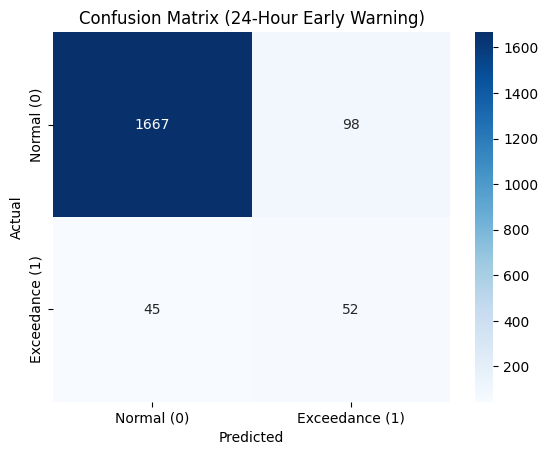

In [23]:
conf_matrix =confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Normal (0)', 'Exceedance (1)'],
          yticklabels=['Normal (0)', 'Exceedance (1)']
)
plt.title("Confusion Matrix (24-Hour Early Warning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=x.columns
).nlargest(10)

In [25]:
print(feature_importance)

CO(GT)             0.098662
PT08.S2(NMHC)      0.070353
PT08.S5(O3)        0.064205
NOx(GT)            0.061023
PT08.S3(NOx)       0.055637
C6H6(GT)           0.052525
CO(GT)_LAG_1H      0.046091
NOx(GT)_LAG_24H    0.040548
NOx(GT)_LAG_1H     0.039116
CO(GT)_LAG_24H     0.036830
dtype: float64


In [26]:
feature_importance.count()

np.int64(10)

/tmp/ipython-input-1013608980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


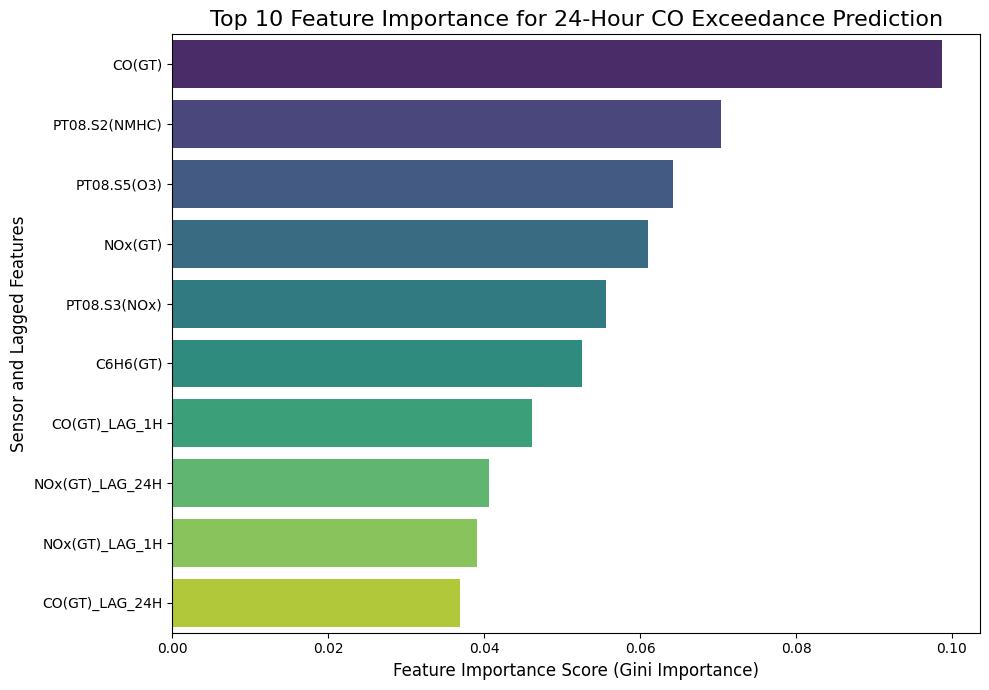

In [27]:
plt.figure(figsize=(10, 7))

# 2. Use Seaborn to create the horizontal bar plot
# .index gives the feature names (X-axis labels)
# .values gives the scores (Y-axis bar lengths)
sns.barplot(
    x=feature_importance.values,
    y=feature_importance.index,
    palette='viridis' # Choose a color scheme
)

# 3. Add labels and a title
plt.title("Top 10 Feature Importance for 24-Hour CO Exceedance Prediction", fontsize=16)
plt.xlabel("Feature Importance Score (Gini Importance)", fontsize=12)
plt.ylabel("Sensor and Lagged Features", fontsize=12)

# 4. Save and display the plot
plt.tight_layout() # Adjusts layout to prevent labels from overlapping
plt.savefig('feature_importance_bar_chart.png')
plt.show()

#Deployment

In [28]:
import joblib

# Saves the trained model object to a file.
joblib.dump(rf_model, 'air_quality_predictor.pkl')

# Download the file to your computer
from google.colab import files
files.download('air_quality_predictor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>